# INSTALL AND IMPORT LIBRARIES
The Python library `apyori` contains the implementation of the Apriori algorithm, which can be installed with Python's `pip` command. This command only needs to be done once per machine.

The standard, shorter approach may work:

In [ ]:
# pip install apyori

If the above command didn't work, it may be necessary to be more explicit, in which case you could run the code below.

In [2]:
# import sys
# !{sys.executable} -m pip install apyori

Once `apyori` is installed, then load the libraries below.

In [3]:
import pandas as pd              # For dataframes
import matplotlib.pyplot as plt  # For plotting data
from apyori import apriori       # For Apriori algorithm

# LOAD AND PREPARE DATA


## Data Source




In [7]:
transactions = []

with open('Epub.csv') as f:
    for line in f:
        transaction = [item for item in line.strip().split(',') if item != 'NaN']
        transactions.append(transaction)
    
transactions[:3]

[['"doc_154"'], ['"doc_3d6"'], ['"doc_16f"']]

# APPLY APRIORI

Call `apriori()` on `transactions`. As parameters `apriori()` can take the minimum support, minimum confidence, minimum lift and minimum items in a transaction. Only the pairs of items that satisfy these criteria would be returned.

In [8]:
rules = list(apriori(
    transactions, 
    min_support=0.001, 
    min_confidence=0.10,
    min_length=2,
    max_length=2))

# Prints one rule
print(rules[0])

RelationRecord(items=frozenset({'"doc_11d"', '"doc_6bf"'}), support=0.001589420815054994, ordered_statistics=[OrderedStatistic(items_base=frozenset({'"doc_6bf"'}), items_add=frozenset({'"doc_11d"'}), confidence=0.12195121951219513, lift=5.388120032885722)])


## Convert Rules to Readable Format
The printed rule above is not very clear. Let's convert it to a more readable format. We'll add a `From` and `To` field to the DataFrame, to indicate a rule's antecedent and consequent respectively. Hence for a rule of the form `A->B`. The `From` will contain `A` and `To` will contain `B`. We'll also add the `Support`, `Confidence` and `Lift` corresponding to each rule in the DataFrame. 

In [9]:
rules_df = pd.DataFrame(
    [{'From': list(rule[0])[0],
    'To': list(rule[0])[1],
    'Support': rule[1],
    'Confidence': rule[2][0][2],
    'Lift': rule[2][0][3]} for rule in rules if len(rule[0]) == 2])
rules_df = rules_df.dropna()

rules_df.head()

,From,To,Support,Confidence,Lift
0,"""doc_11d""","""doc_6bf""",0.001589,0.121951,5.388120
1,"""doc_4ac""","""doc_16e""",0.002797,0.346457,53.425660
2,"""doc_466""","""doc_19f""",0.001526,0.173913,25.806399
3,"""doc_3ec""","""doc_1a2""",0.001017,0.115942,13.311330
4,"""doc_4c7""","""doc_1a2""",0.002098,0.239130,17.996568


## List Rules with N's
The code below calls `plot()` on each row of the rules DataFrame to create a list of all the mined rules. First, we have to add two numeric columns corresponding to each item to `rules_df`.

In [10]:
# Pick top rules
rules_df = rules_df.sort_values('Support', ascending=False).head(50)

# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
rules_df.head(20)

,From,To,Support,Confidence,Lift,FromN,ToN
53,"""doc_72f""","""doc_813""",0.004069,0.351648,16.811784,17,32
1,"""doc_4ac""","""doc_16e""",0.002797,0.346457,53.425660,30,3
14,"""doc_71""","""doc_364""",0.002734,0.233696,15.912549,13,31
46,"""doc_6bf""","""doc_60e""",0.002670,0.274510,21.062267,20,41
60,"""doc_972""","""doc_8f9""",0.002162,0.177083,18.693582,0,55
4,"""doc_4c7""","""doc_1a2""",0.002098,0.239130,17.996568,9,16
8,"""doc_424""","""doc_359""",0.001844,0.271028,44.406250,29,34
37,"""doc_84b""","""doc_4da""",0.001780,0.231405,34.016529,33,14
12,"""doc_43d""","""doc_364""",0.001780,0.152174,16.064050,39,31
58,"""doc_8af""","""doc_8a8""",0.001717,0.290323,47.077153,45,48


## Plot Rules
Plot each pair of items in the rule. If a rule is A->B, then the item A is in the bottom row of the plot (y=0) and B is in the top row (y=1). The color of each line indicates the support of the rule multiplied by 100 (support*100). The width of each line is controlled by the confidence of each rule.

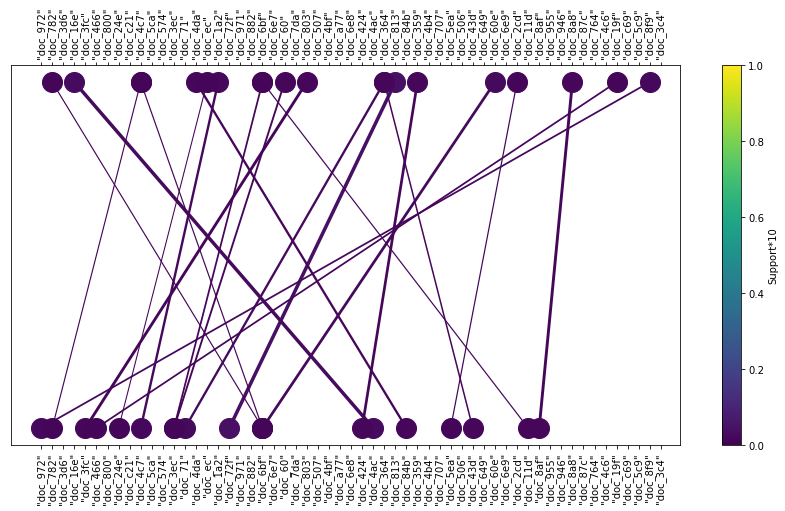

In [11]:
# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10),
             markersize=20,
             lw=row['Confidence'] * 10)

# Adds a colorbar and its title  
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()